In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures


database = pd.read_csv('/Users/Florian/Documents/BigData/openclassrooms/pythons/projet2_datascientist/food1.csv'
                       ,sep='\t', header=0)


# On crée une liste contenant pour chaque colonne du dataframe le pourcentage de valeurs nulles qu'elle contient

liste = []
liste2 = database.columns.values.tolist()
bob = []
compte = 0
for i in liste2:
    bob.append(pd.isnull(database[i]))
    compte = 0
    for j in bob[0]:
        if j == True:
            compte = compte + 1    
    bob = []
    liste.append(compte/1999*100)
print('Liste contenant le pourcentage de valeurs nulles pour chaque variable créée')

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Figure, Layout

iplot([Scatter(x=liste2, y=liste,
              mode='markers', marker = dict(color = np.random.randn(500), colorscale = 'YlOrRd'))])


# on crée une nouvelle liste en excluant les colonnes ayant moins de 50% de valeurs remplies


# on récupère le nom des colonnes concernées dans une liste
liste = []
liste2 = database.columns.values.tolist()  # on récupère le nom des colonnes dans une liste
bob = []
compte = 0
for i in liste2:
    bob.append(pd.isnull(database[i]))  #on regarde pour chaque colonne de liste2 si elle contient des valeurs nulles
                                        #si oui, alors on inclue le booléen de retour dans la liste bob
    compte = 0
    for j in bob[0]:
        if j == True:  # si bob contient vrai, alors on incrémente compte pour avoir le nombre total de valeurs nulles
            compte = compte + 1    
    bob = []      # on remet à zéro bob pour changer de colonne
    liste.append(compte/1999*100) #une fois le parcours de la colonne, on calcule son pourcentage de valeurs nulles
new_liste = []   #on crée la liste qui contiendra le nom des colonnes avec moins de 50% de valeurs nulles
for j in range(len(liste)):          #on parcours la liste contenant le 
    if liste[j] < 50:
        new_liste.append(liste2[j])  #on remplit new_liste avec le nom des colonnes avec moins de 50% de valeurs nulles

#on récupère la dataframe avec les colonnes concernées
new_database = pd.DataFrame(database, columns = new_liste)

liste = []
liste2 = new_database.columns.values.tolist()  #dans une liste on récupère le nom des colonnes de la nouvelle dataframe
bob = []
compte = 0
for i in liste2:
    bob.append(pd.isnull(new_database[i]))
    compte = 0
    for j in bob[0]:
        if j == True:
            compte = compte + 1    #on compte le nombre de valeurs nulles pour chaque colonne
    bob = []
    liste.append(compte/1999*100)   #on calcule le pourcentage de valeurs nulles
for j in range(len(liste)):
    if liste[j] < 50:               #on remplit la liste avec les colonnes concernées 
        new_liste.append(liste2[j])


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Figure, Layout

iplot([Scatter(x=new_liste, y=liste,
              mode='markers', marker = dict(color = np.random.randn(500), colorscale = 'YlOrRd'))])

# on va garder certaines colonnes non numériques qui sont dignes d'intérêt : les variables pays notamment (uniquement
#france, USA et UK puisque les autres pays ont trop peu d'entrées pour être intéressants). Pour cela on va créer une
#nouvelle colonne pour chaque pays. 

new_database['fr'] = 0
new_database['uk'] = 0
new_database['usa'] = 0

compteur = 0
for j in new_database['countries_fr']:
    if j == 'France':
        new_database['fr'].iloc[compteur] = 1
    compteur = compteur + 1

print('colonne fr remplie')

compteur = 0

for j in new_database['countries_fr']:
    if j == 'Royaume-Uni':
        new_database['uk'].iloc[compteur] = 1
    compteur = compteur + 1

print('colonne uk remplie')

compteur = 0

for j in new_database['countries_fr']:
    if j == 'États-Unis':
        new_database['usa'].iloc[compteur] = 1
    compteur = compteur + 1

print('colonne usa remplie')

compteur = 0



#certaines colonnes sont toujours inutiles, on ne souhaite garder que les colonnes contenant des valeurs numériques

base_num = new_database._get_numeric_data()  
base_num.head()                             

#on crée base_num_réduite qui ne contient pas les colonnes numériques inutiles : code, created_t et last_modified_t

base_num_reduite = base_num.drop(['code','created_t','last_modified_t'], axis = 1) 

# on souhaite remplacer les valeurs NaN par la moyenne des valeurs de la colonne. Ainsi, si la colonne contient
# beaucoup de zéros, la valeur que l'on ajoutera sera proche de zéro et n'aura pas un fort impact dans le cas où nous
# souhaiterions faire des statistiques sur la variable en question. Si la colonne contient peu de zéros, alors
# rajouter une valeur correspondant à la moyenne des valeurs de la colonne aura moins d'impact que de mettre un zéro

print('remplacement des valeurs NaN par la moyenne des valeurs de chaque colonne')
moyenne = []
for i in base_num_reduite:
    print('parcours de colonne ', i)
    temp = []
    compteur = 0
    for j in base_num_reduite[i]:
        if np.isnan(j) == False:   
            temp.append(j)
    moyenne_temp = np.mean(np.array(temp))

    for k in base_num_reduite[i]:    
        if np.isnan(k) == True:       
            base_num_reduite[i].iloc[compteur] = moyenne_temp
            compteur = compteur +1
        else:
            compteur = compteur +1 


# on retire les valeurs extrêmes en les remplaçant par la valeur du 3e quartile

print('remplacement des valeurs extremes')

compteur = 0
for i in base_num_reduite:
    changed =0
    unchanged =0
    compteur = 0
    for j in base_num_reduite[i]:
        
        modified = False
        if j > (2*base_num_reduite[i].head().describe().loc['std'] + base_num_reduite[i].head().describe().loc['mean']):
            base_num_reduite[i].iloc[compteur] = base_num_reduite[i].head().describe().loc['75%']
            changed = changed+1
        else:
            unchanged = unchanged + 1
        compteur = compteur + 1
    print('ligne', i, 'ok, changement : ',changed,' maintenus ', unchanged,len(base_num_reduite[i]))
print('parcours termine')




            
base_num_reduite.head()




//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Liste contenant le pourcentage de valeurs nulles pour chaque variable créée


//anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



colonne fr remplie
colonne uk remplie
colonne usa remplie
remplacement des valeurs NaN par la moyenne des valeurs de chaque colonne
parcours de colonne  additives_n
parcours de colonne  ingredients_from_palm_oil_n
parcours de colonne  ingredients_that_may_be_from_palm_oil_n
parcours de colonne  energy_100g
parcours de colonne  fat_100g
parcours de colonne  saturated-fat_100g
parcours de colonne  trans-fat_100g
parcours de colonne  cholesterol_100g
parcours de colonne  carbohydrates_100g
parcours de colonne  sugars_100g
parcours de colonne  fiber_100g
parcours de colonne  proteins_100g
parcours de colonne  salt_100g
parcours de colonne  sodium_100g
parcours de colonne  vitamin-a_100g
parcours de colonne  vitamin-c_100g
parcours de colonne  calcium_100g
parcours de colonne  iron_100g
parcours de colonne  nutrition-score-fr_100g
parcours de colonne  nutrition-score-uk_100g
parcours de colonne  fr
parcours de colonne  uk
parcours de colonne  usa
remplacement des valeurs extremes
ligne addi

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
0,2.137222,0.001111,0.091111,1480.626267,18.674183,9.838392,0.024565,0.013535,40.265324,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,1,0.0,0
1,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,...,0.00000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000,0,0.0,1
2,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,...,0.25000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000,0,0.0,1
3,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,0.024565,0.013535,17.860000,3.570000,...,0.48200,0.000099,0.007633,0.143000,0.005140,12.000000,12.000000,0,0.0,1
4,0.000000,0.000000,0.000000,1552.000000,1.430000,9.838392,0.024565,0.013535,77.140000,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,0,0.0,1


In [2]:
print(database.shape)
database.head()


(1999, 162)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
base_num_reduite.head(500)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
0,2.137222,0.001111,0.091111,1480.626267,18.674183,9.838392,0.024565,0.013535,40.265324,26.137915,...,1.038210,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,1,0.0,0
1,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,...,0.000000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000,0,0.0,1
2,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,...,0.250000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000,0,0.0,1
3,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,0.024565,0.013535,17.860000,3.570000,...,0.482000,0.000099,0.007633,0.143000,0.005140,12.000000,12.000000,0,0.0,1
4,0.000000,0.000000,0.000000,1552.000000,1.430000,9.838392,0.024565,0.013535,77.140000,26.137915,...,1.038210,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,0,0.0,1
5,0.000000,0.000000,0.000000,1933.000000,18.270000,1.920000,0.024565,0.013535,63.460000,11.540000,...,1.038210,0.000099,0.007633,0.038000,0.003460,14.128405,14.113619,0,0.0,1
6,0.000000,0.000000,0.000000,1490.000000,18.674183,9.838392,0.024565,0.013535,80.000000,26.137915,...,1.038210,0.000099,0.002700,0.044000,0.001983,14.128405,14.113619,0,0.0,1
7,2.000000,0.000000,0.000000,1833.000000,18.750000,4.690000,0.024565,0.013535,57.810000,15.620000,...,0.055000,0.000099,0.007633,0.062000,0.004220,7.000000,7.000000,0,0.0,1
8,0.000000,0.000000,0.000000,2406.000000,37.500000,22.500000,0.024565,0.013535,55.000000,26.137915,...,1.038210,0.000099,0.007633,0.050000,0.001983,14.128405,14.113619,0,0.0,1
9,0.000000,0.000000,0.000000,2243.000000,28.570000,7.140000,0.024565,0.013535,40.265324,26.137915,...,1.038210,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,0,0.0,1


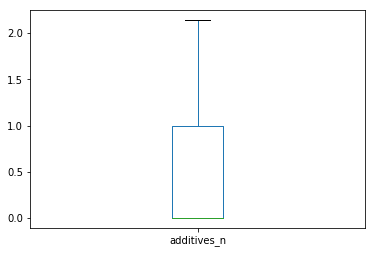

In [4]:
base_num_reduite['additives_n'].plot.box()
plt.show()

In [5]:
base_num_reduite.head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
0,2.137222,0.001111,0.091111,1480.626267,18.674183,9.838392,0.024565,0.013535,40.265324,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,1,0.0,0
1,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,...,0.00000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000,0,0.0,1
2,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,...,0.25000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000,0,0.0,1
3,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,0.024565,0.013535,17.860000,3.570000,...,0.48200,0.000099,0.007633,0.143000,0.005140,12.000000,12.000000,0,0.0,1
4,0.000000,0.000000,0.000000,1552.000000,1.430000,9.838392,0.024565,0.013535,77.140000,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,0,0.0,1


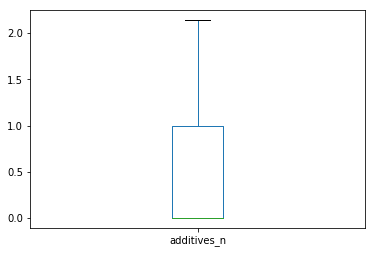

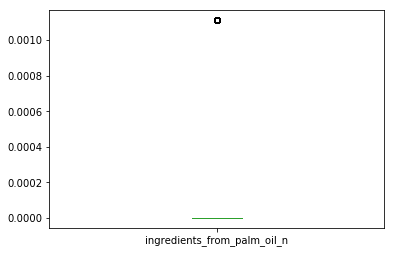

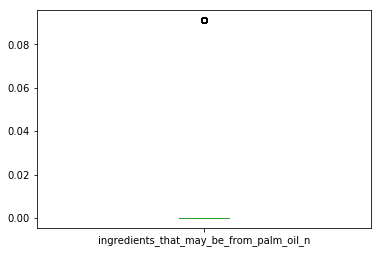

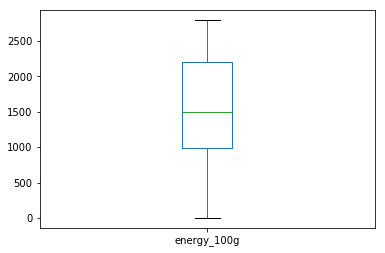

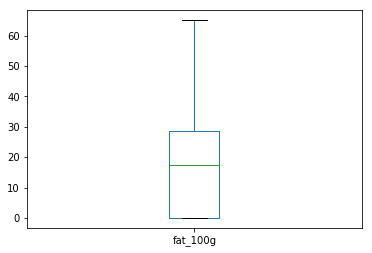

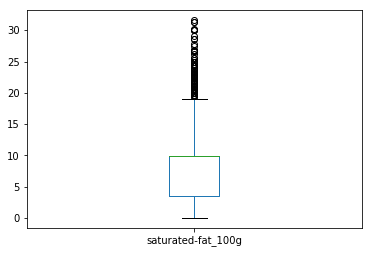

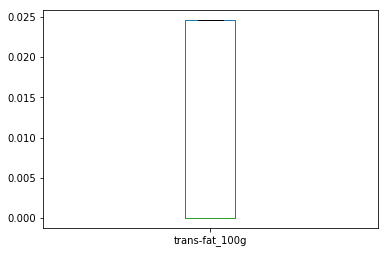

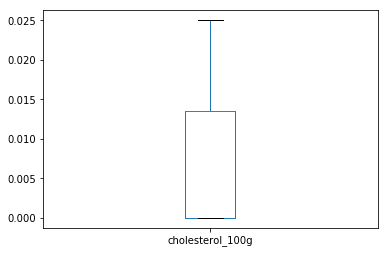

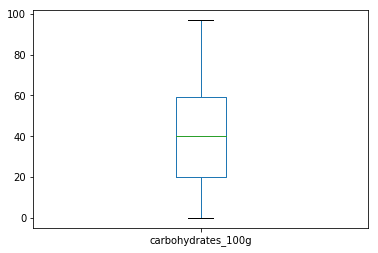

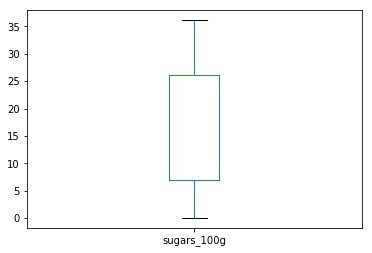

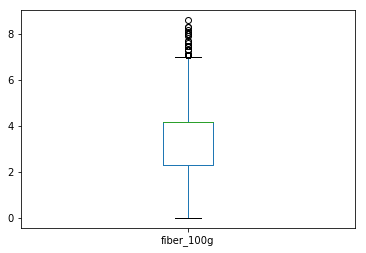

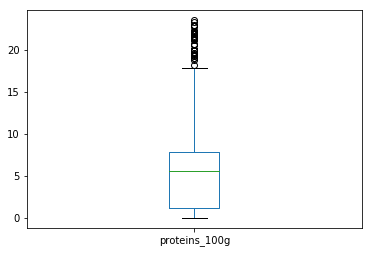

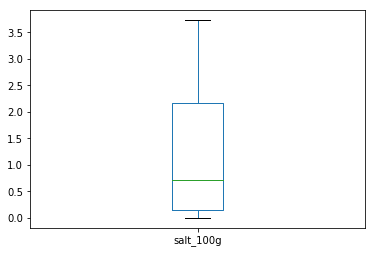

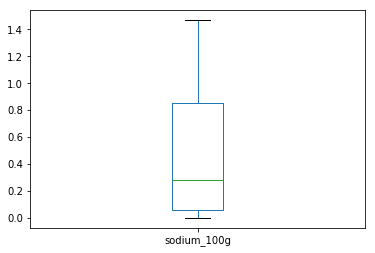

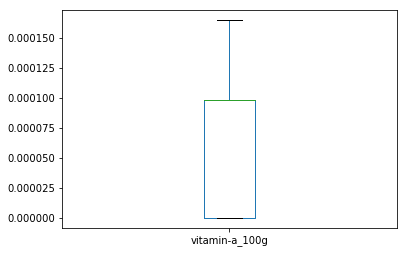

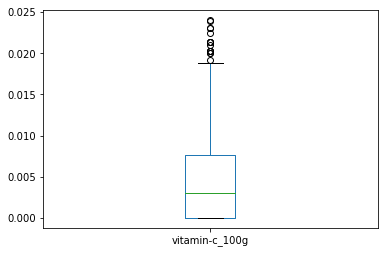

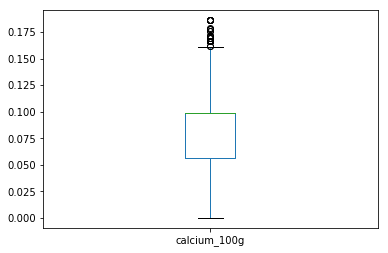

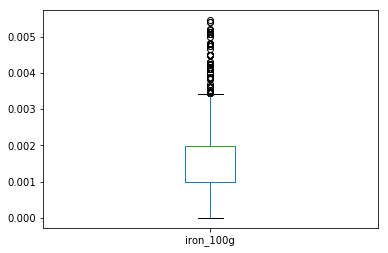

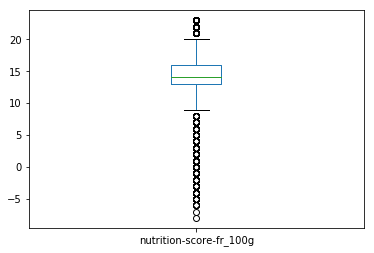

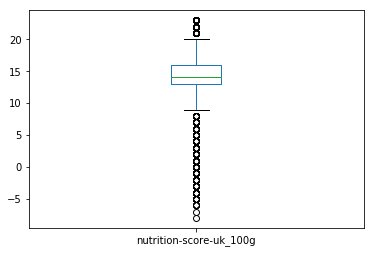

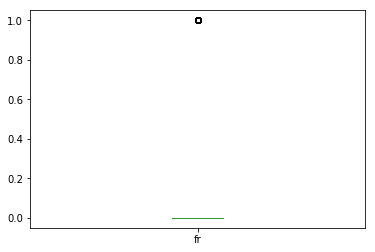

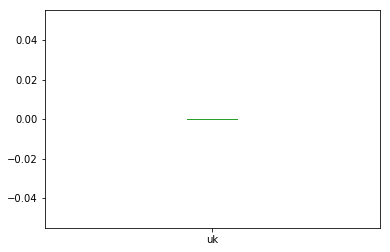

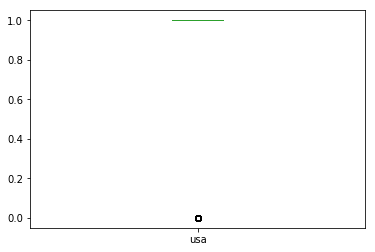

In [6]:
%matplotlib inline

for i in base_num_reduite:
    base_num_reduite[i].plot.box()
    plt.show()

In [7]:
%matplotlib inline

import plotly.plotly as py
import plotly.graph_objs as go
compteur = 0
liste_colonne = base_num_reduite.columns.values.tolist()
for i in base_num_reduite:
    iplot([go.Histogram(x=base_num_reduite[i])])
    print(liste_colonne[compteur])
    plt.show()
    compteur = compteur + 1

additives_n


ingredients_from_palm_oil_n


ingredients_that_may_be_from_palm_oil_n


energy_100g


fat_100g


saturated-fat_100g


trans-fat_100g


cholesterol_100g


carbohydrates_100g


sugars_100g


fiber_100g


proteins_100g


salt_100g


sodium_100g


vitamin-a_100g


vitamin-c_100g


calcium_100g


iron_100g


nutrition-score-fr_100g


nutrition-score-uk_100g


fr


uk


usa


In [8]:
base_ACP = base_num_reduite.drop(['nutrition-score-fr_100g', 'nutrition-score-uk_100g'], axis = 1) 


In [9]:
base_ACP.head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fr,uk,usa
0,2.137222,0.001111,0.091111,1480.626267,18.674183,9.838392,0.024565,0.013535,40.265324,26.137915,...,6.897531,2.637041,1.03821,0.000099,0.007633,0.098383,0.001983,1,0.0,0
1,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,...,3.570000,0.000000,0.00000,0.000000,0.021400,0.000000,0.001290,0,0.0,1
2,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,...,17.860000,0.635000,0.25000,0.000000,0.000000,0.071000,0.001290,0,0.0,1
3,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,0.024565,0.013535,17.860000,3.570000,...,17.860000,1.224280,0.48200,0.000099,0.007633,0.143000,0.005140,0,0.0,1
4,0.000000,0.000000,0.000000,1552.000000,1.430000,9.838392,0.024565,0.013535,77.140000,26.137915,...,8.570000,2.637041,1.03821,0.000099,0.007633,0.098383,0.001983,0,0.0,1


In [10]:
# on essaye de réaliser une ACP analyse multivariée


X = base_ACP.values #pour transformer en un array numpy
print(X.shape)


(1999, 21)


In [11]:
from sklearn import preprocessing #pour standardiser les valeurs
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)


In [12]:
from sklearn import decomposition #pour faire l'ACP
pca = decomposition.PCA(n_components = 7) #pour tenter une représentation a deux composantes
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())  #40% de variance expliquée au total... mauvais modèle

[ 0.25152028  0.15738548  0.11374693  0.10827391  0.06993745  0.05475285
  0.0346357 ]
[ 0.25152028  0.40890576  0.52265269  0.6309266   0.70086405  0.7556169
  0.7902526 ]


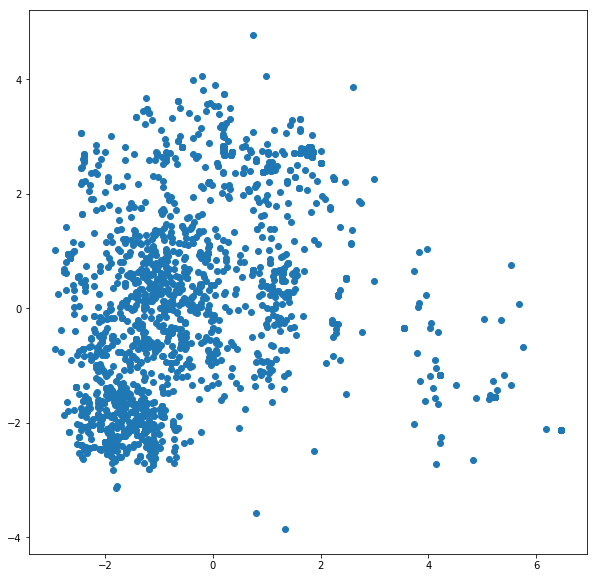

In [14]:
X_projected = pca.transform(X_scaled)
fig = plt.figure(figsize =(10,10))
plt.scatter(X_projected[:,0], X_projected[:,1])


plt.show()

In [15]:
pcs = pca.components_

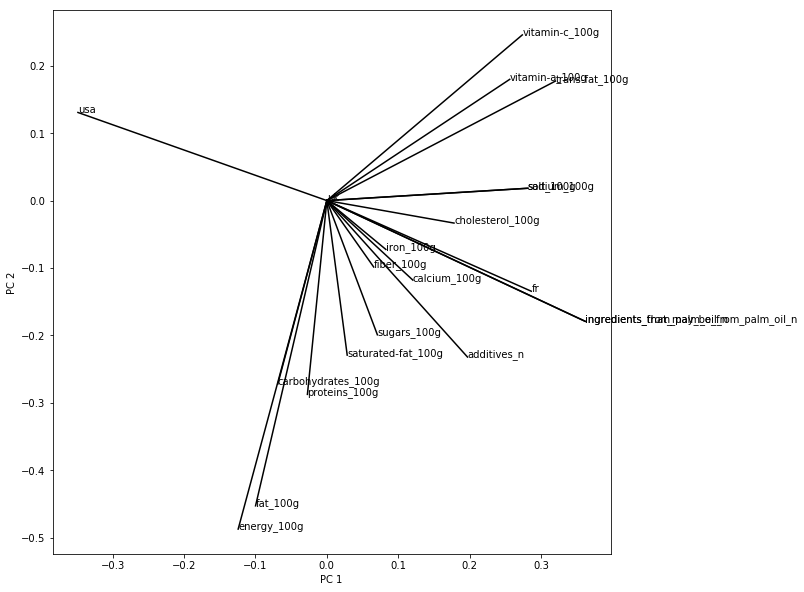

In [16]:
fig = plt.figure(figsize =(10,10))

for i, (x,y) in enumerate(zip(pcs[0,:],
                       pcs[1,:] )):
    plt.plot([0,x],[0,y], color = 'k')
    plt.text(x, y, base_ACP.columns[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')        
plt.show()

# vitamin A et C apportent la même information, on peut en utiliser qu'une des deux
#iron_100g et fiber_100g sont également substituables

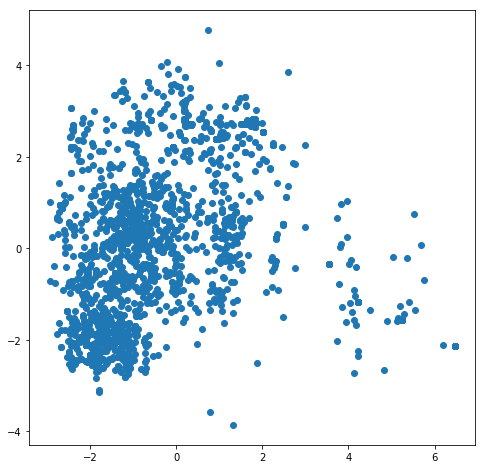

In [17]:
%matplotlib inline
fig = plt.figure(figsize =(8,8))
plt.scatter(X_projected[:,0], X_projected[:,1])



plt.show()

In [18]:
base_num_reduite.head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
0,2.137222,0.001111,0.091111,1480.626267,18.674183,9.838392,0.024565,0.013535,40.265324,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,1,0.0,0
1,0.000000,0.000000,0.000000,2243.000000,28.570000,28.570000,0.000000,0.018000,64.290000,14.290000,...,0.00000,0.000000,0.021400,0.000000,0.001290,14.000000,14.000000,0,0.0,1
2,0.000000,0.000000,0.000000,1941.000000,17.860000,0.000000,0.000000,0.000000,60.710000,17.860000,...,0.25000,0.000000,0.000000,0.071000,0.001290,0.000000,0.000000,0,0.0,1
3,0.000000,0.000000,0.000000,2540.000000,57.140000,5.360000,0.024565,0.013535,17.860000,3.570000,...,0.48200,0.000099,0.007633,0.143000,0.005140,12.000000,12.000000,0,0.0,1
4,0.000000,0.000000,0.000000,1552.000000,1.430000,9.838392,0.024565,0.013535,77.140000,26.137915,...,1.03821,0.000099,0.007633,0.098383,0.001983,14.128405,14.113619,0,0.0,1


In [19]:
print(base_num_reduite.shape)

(1999, 23)


In [20]:
# correlation de pearson entre toutes les variables entre elles

from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

bob  =  base_num_reduite.columns.values.tolist()
pearson_dataframe = pd.DataFrame(np.zeros((23,23)), columns=bob, index = bob)

for i in base_num_reduite:
    for j in base_num_reduite:
        pearson_dataframe[i].loc[j] = pearsonr(base_num_reduite[i], base_num_reduite[j])[0]
pearson_dataframe.head()


//anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:3029: RuntimeWarning:

invalid value encountered in double_scalars



,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
additives_n,1.000000,0.587310,0.587310,0.117897,0.126497,0.025243,0.036929,0.123837,0.141389,0.193629,...,0.163909,0.030133,0.026160,0.089719,-0.044654,0.061558,0.058174,0.358921,NaN,-0.419135
ingredients_from_palm_oil_n,0.587310,1.000000,1.000000,-0.020821,0.008300,0.033682,0.366696,0.174466,0.002397,0.137965,...,0.377717,0.231997,0.270870,0.130172,0.076900,-0.023377,-0.026063,0.624981,NaN,-0.776912
ingredients_that_may_be_from_palm_oil_n,0.587310,1.000000,1.000000,-0.020821,0.008300,0.033682,0.366696,0.174466,0.002397,0.137965,...,0.377717,0.231997,0.270870,0.130172,0.076900,-0.023377,-0.026063,0.624981,NaN,-0.776912
energy_100g,0.117897,-0.020821,-0.020821,1.000000,0.824256,0.370371,-0.373747,0.003260,0.460147,0.199921,...,-0.191587,-0.316983,-0.424308,0.131493,0.103509,0.440845,0.444927,-0.015658,NaN,0.039113
fat_100g,0.126497,0.008300,0.008300,0.824256,1.000000,0.417137,-0.351456,0.060374,0.105666,0.146277,...,-0.158291,-0.259031,-0.401332,0.212422,0.065432,0.406891,0.408625,0.004865,NaN,0.025056


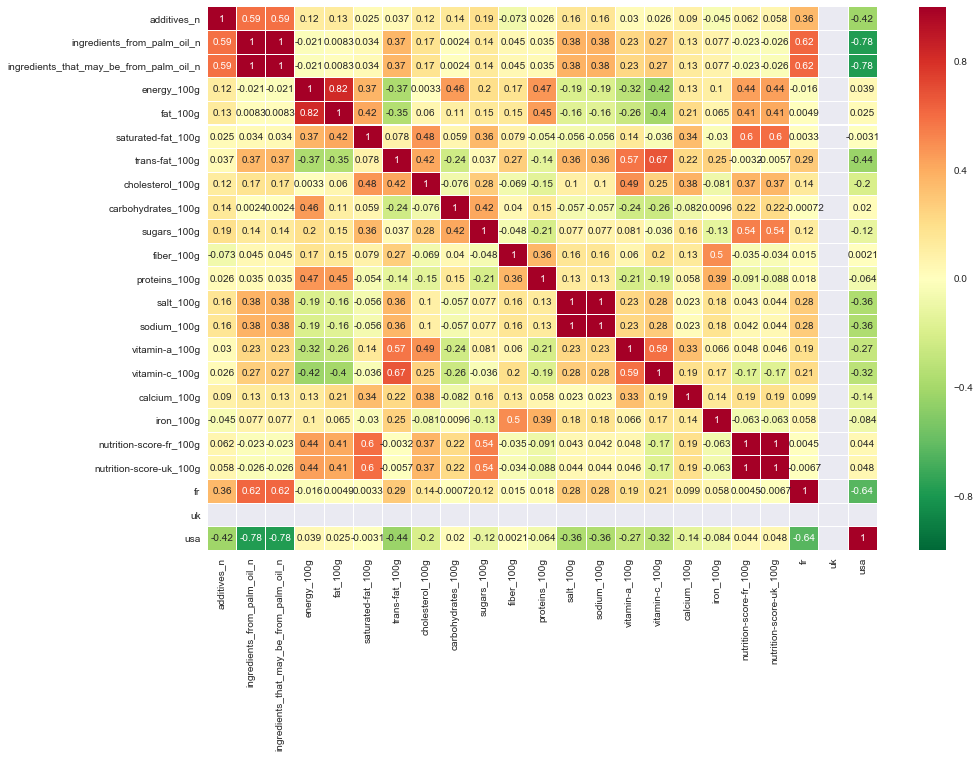

In [21]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(pearson_dataframe, cmap='RdYlGn_r', linewidths=0.01, annot=True)

In [22]:
# correlation de spearman entre toutes les variables entre elles

bob  =  base_num_reduite.columns.values.tolist()
spearman_dataframe = pd.DataFrame(np.zeros((23,23)), columns=bob, index = bob)



for i in base_num_reduite:
    for j in base_num_reduite:
        spearman_dataframe[i].loc[j] = spearmanr(base_num_reduite[i], base_num_reduite[j])[0]
spearman_dataframe.head()
       

//anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning:

invalid value encountered in true_divide

//anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning:

invalid value encountered in true_divide

//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning:

invalid value encountered in greater

//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning:

invalid value encountered in less

//anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning:

invalid value encountered in less_equal



,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,...,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,fr,uk,usa
additives_n,1.000000,0.584006,0.584006,0.127759,0.225045,0.069143,0.020917,0.160117,0.114998,0.217951,...,0.186855,-0.007188,0.008915,0.104947,-0.067201,0.111567,0.109066,0.355090,NaN,-0.412216
ingredients_from_palm_oil_n,0.584006,1.000000,1.000000,-0.079123,0.075513,0.091320,0.366696,0.159827,-0.045441,0.137876,...,0.338422,0.241225,0.300840,0.112148,0.114031,-0.035840,-0.037668,0.624981,NaN,-0.776912
ingredients_that_may_be_from_palm_oil_n,0.584006,1.000000,1.000000,-0.079123,0.075513,0.091320,0.366696,0.159827,-0.045441,0.137876,...,0.338422,0.241225,0.300840,0.112148,0.114031,-0.035840,-0.037668,0.624981,NaN,-0.776912
energy_100g,0.127759,-0.079123,-0.079123,1.000000,0.851975,0.323023,-0.383886,0.021276,0.365134,0.208527,...,-0.157623,-0.386671,-0.466522,0.148248,0.041748,0.429403,0.432062,-0.058153,NaN,0.093280
fat_100g,0.225045,0.075513,0.075513,0.851975,1.000000,0.347385,-0.364925,0.088497,0.173493,0.202308,...,0.003845,-0.302764,-0.435618,0.188307,0.001522,0.392778,0.395575,0.055496,NaN,-0.052676


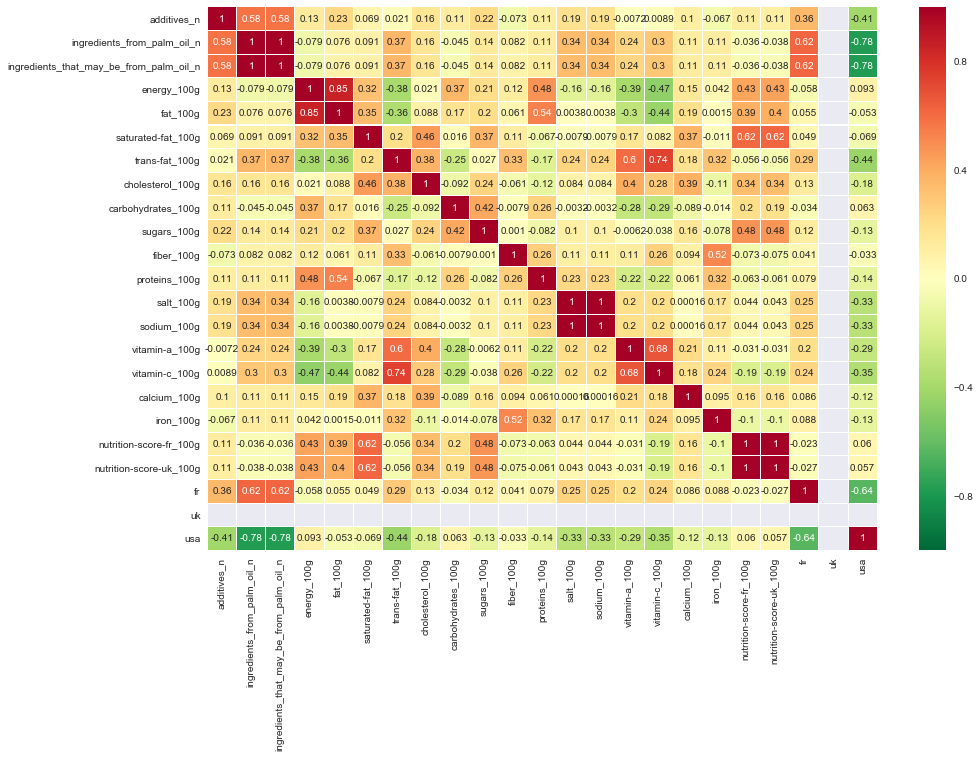

In [23]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(15,10))
sns.heatmap(spearman_dataframe, cmap='RdYlGn_r', linewidths=0.01, annot=True)

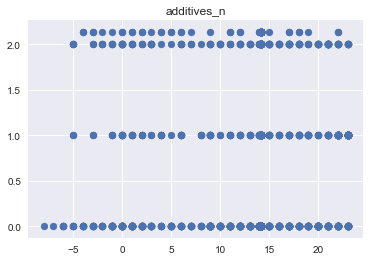

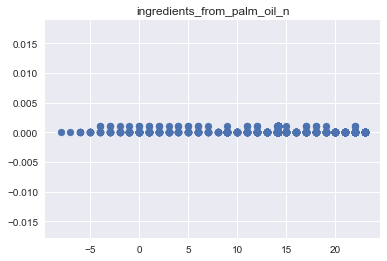

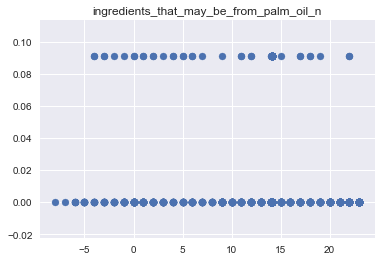

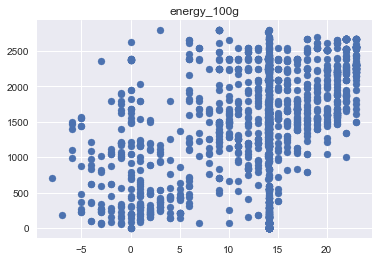

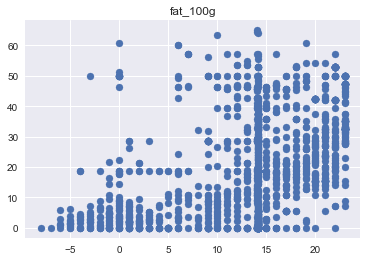

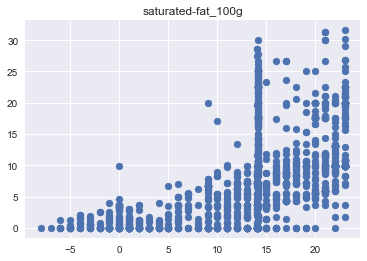

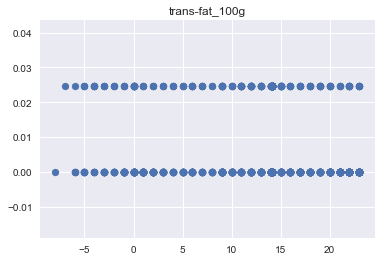

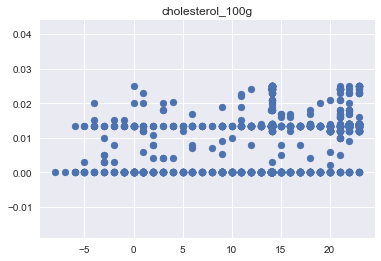

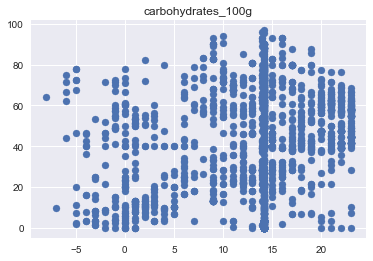

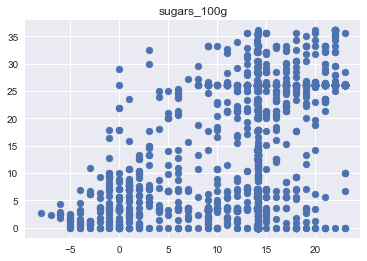

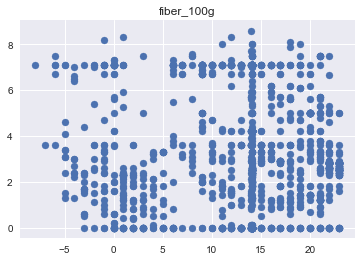

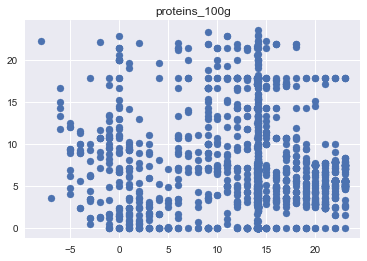

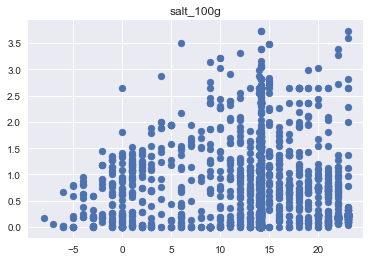

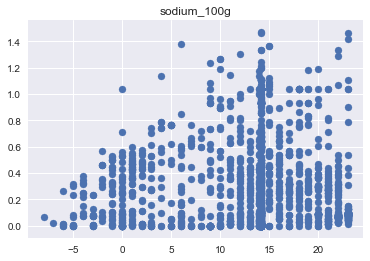

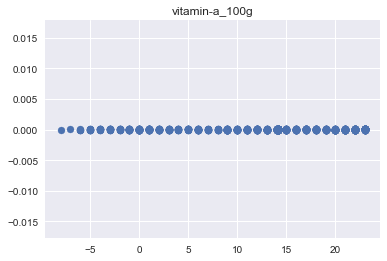

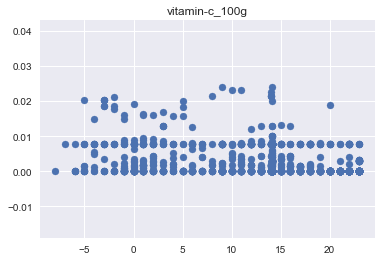

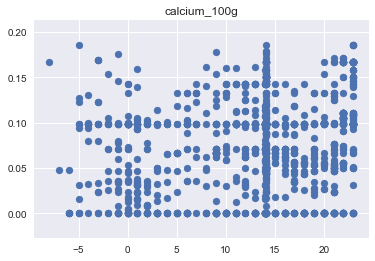

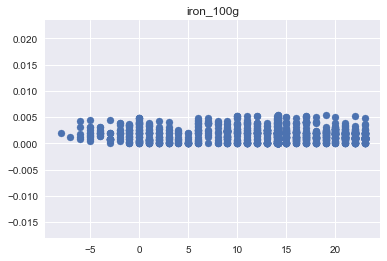

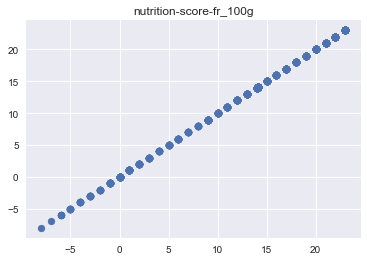

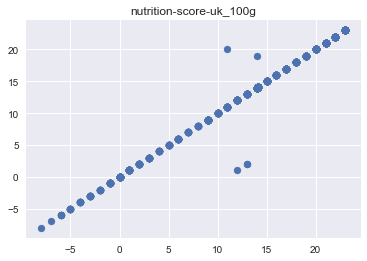

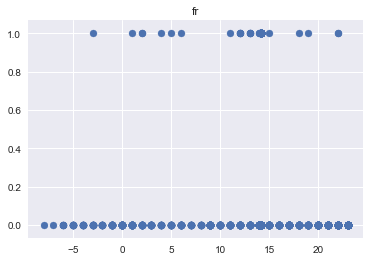

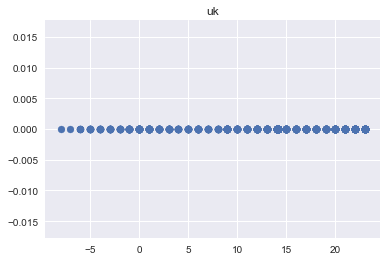

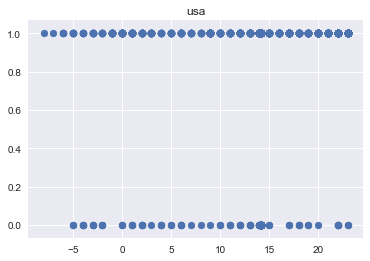

In [24]:
# plot de chaque variable en fonction de nutrition-score-fr_100g

compteur = 0
liste_colonne = base_num_reduite.columns.values.tolist()
for i in base_num_reduite:
    fig.canvas.set_window_title(base_num_reduite[i])
    plt.scatter(base_num_reduite['nutrition-score-fr_100g'],base_num_reduite[i])
    plt.title(liste_colonne[compteur])
    plt.show()
    compteur = compteur + 1

In [25]:
# il semble que le nutrition-score-fr_100g soit proportionnel à : energy_100g ; fat_100G; saturated-fat_100g ; cholesterol_100g; sugars_100g
#on va créer un dataframe avec uniquement ces colonnes pour refaire une ACP

In [26]:
liste_to_keep = []
liste_to_keep.append('energy_100g')
liste_to_keep.append('saturated-fat_100g')
liste_to_keep.append('cholesterol_100g')
liste_to_keep.append('fat_100g')
liste_to_keep.append('sugars_100g')
liste_to_keep.append('nutrition-score-fr_100g')
#liste_to_keep.append('vitamine-c_100g')
#liste_to_keep.append('proteins_100g')
#liste_to_keep.append('fiber_100g')
database_test = pd.DataFrame(base_num_reduite, columns = liste_to_keep)
database_test.head()



,energy_100g,saturated-fat_100g,cholesterol_100g,fat_100g,sugars_100g,nutrition-score-fr_100g
0,1480.626267,9.838392,0.013535,18.674183,26.137915,14.128405
1,2243.000000,28.570000,0.018000,28.570000,14.290000,14.000000
2,1941.000000,0.000000,0.000000,17.860000,17.860000,0.000000
3,2540.000000,5.360000,0.013535,57.140000,3.570000,12.000000
4,1552.000000,9.838392,0.013535,1.430000,26.137915,14.128405


In [27]:
# on essaye de réaliser une ACP analyse multivariée sur database_test

X = database_test.values #pour transformer en un array numpy
print(X.shape)



(1999, 6)


In [28]:
from sklearn import preprocessing #pour standardiser les valeurs
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [29]:
from sklearn import decomposition #pour faire l'ACP
pca = decomposition.PCA(n_components = 2) #pour tenter une représentation a deux composantes
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
print(pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.cumsum())  #bon modèle à priori (71% de variance expliquée)

[ 0.48332722  0.2320752 ]
[ 0.48332722  0.71540242]


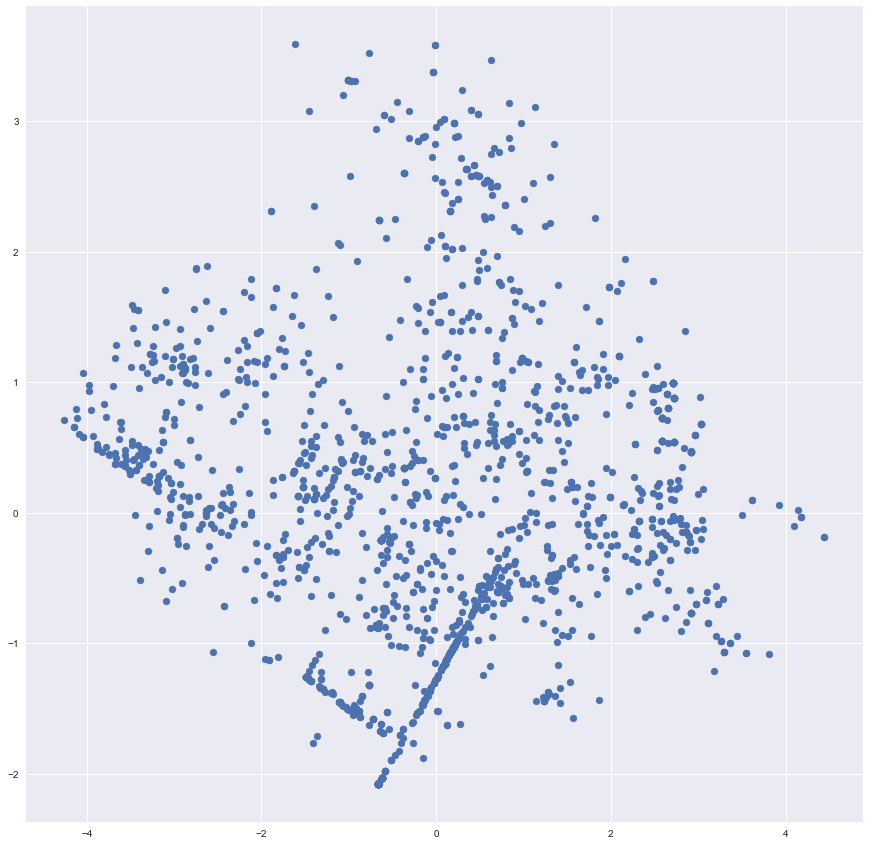

In [31]:
X_projected = pca.fit_transform(X_scaled)
fig = plt.figure(figsize =(15,15))
plt.scatter(X_projected[:,0], X_projected[:,1])


plt.show()

In [32]:
pcs = pca.components_

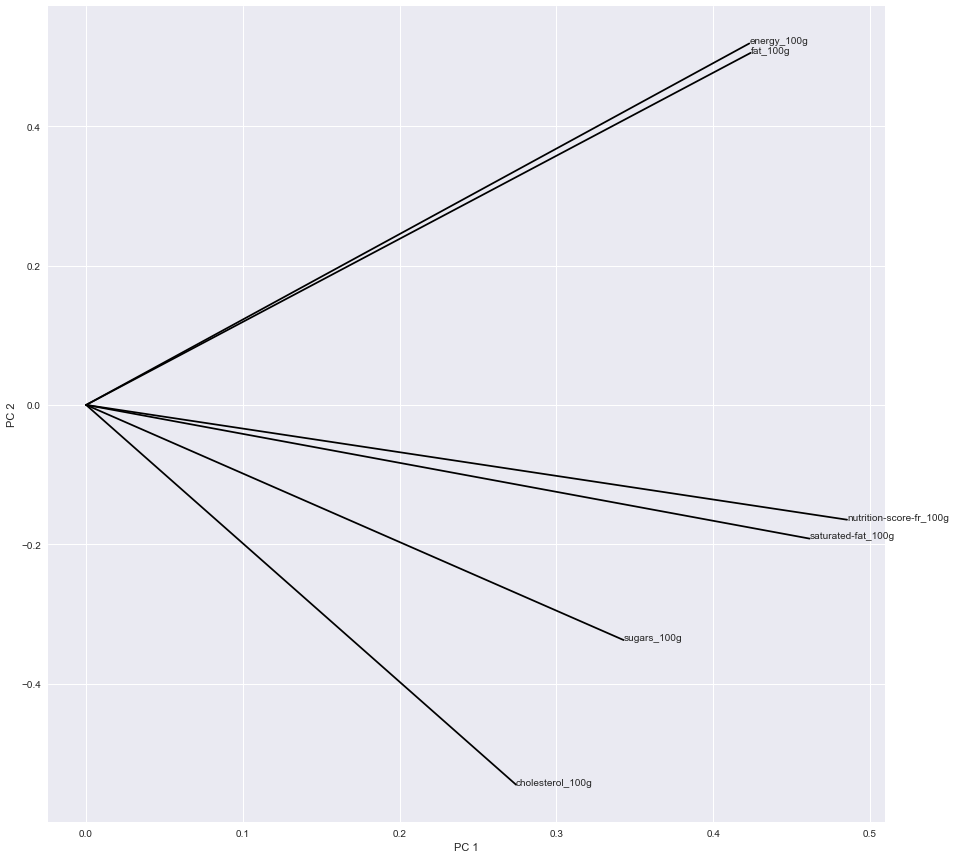

In [33]:
fig = plt.figure(figsize =(15,15))

for i, (x,y) in enumerate(zip(pcs[0,:],
                       pcs[1,:] )):
    plt.plot([0,x],[0,y], color = 'k')
    plt.text(x, y, database_test.columns[i])
plt.xlabel('PC 1')
plt.ylabel('PC 2')        
plt.show()

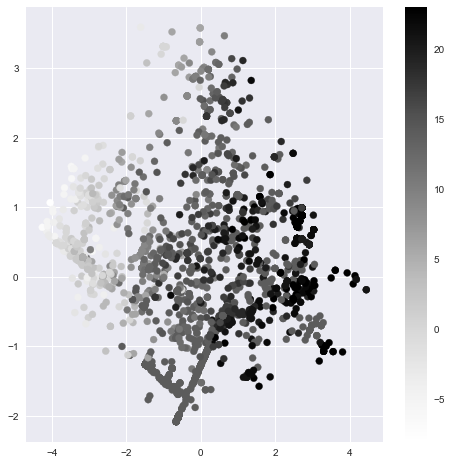

In [34]:
fig = plt.figure(figsize =(8,8))
plt.scatter(X_projected[:,0], X_projected[:,1],c = database_test.get('nutrition-score-fr_100g'))
plt.colorbar()


plt.show()

In [35]:
# en gros, plus on a une forte quantité de sucres, gras saturés et energy apporté, moins l'aliment est bon car le 
#nutrition-score-fr_100g augmente

In [36]:
new1 = pd.DataFrame(np.zeros([1999, 2]), columns = ["y1", "y2"])
new1["y1"] = base_num_reduite['nutrition-score-fr_100g']
new1["y2"] = base_num_reduite['nutrition-score-fr_100g']

new1.head(300)


,y1,y2
0,14.128405,14.128405
1,14.000000,14.000000
2,0.000000,0.000000
3,12.000000,12.000000
4,14.128405,14.128405
5,14.128405,14.128405
6,14.128405,14.128405
7,7.000000,7.000000
8,14.128405,14.128405
9,14.128405,14.128405


matrice X_arr   [[ 0.59325747 -0.55974139]
 [ 2.47008574 -0.34065819]
 [-1.83665413  1.72425282]
 ..., 
 [ 0.00787944 -1.52336925]
 [ 0.59164293  0.34054198]
 [ 0.51663019 -0.00772351]] matrice Y_arr  [[ 14.12840467  14.12840467]
 [ 14.          14.        ]
 [  0.           0.        ]
 ..., 
 [ 12.          12.        ]
 [ 19.          19.        ]
 [ 19.          19.        ]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
coef :  (2, 2)
intercept :  (2,)


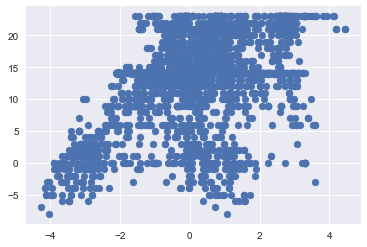

0.728346644512


In [46]:




X_arr = np.matrix(X_projected)
Y_arr = np.matrix(new1)
print('matrice X_arr', ' ', X_arr, 'matrice Y_arr ',Y_arr)
xtrain_arr, xtest_arr, ytrain_arr, ytest_arr = train_test_split(X_arr, Y_arr, train_size = 0.8)
model_arr = linear_model.LinearRegression()

model_arr.fit(xtrain_arr, ytrain_arr)
print(model_arr.get_params())
print('coef : ', model_arr.coef_.shape)
print('intercept : ',model_arr.intercept_.shape)

#on calcule la variance (et on l'affiche)

accuracy_arr = model_arr.score(xtest_arr, ytest_arr)
plt.scatter(X_projected ,new1)
plt.plot(xtest_arr, model_arr.predict(xtest_arr), color='green')
plt.show()
print(accuracy_arr)